## This notebook demonstarates the S-Method. 
See Boashash+15 Section 6.2 for instance.

In [2]:
using Winston;
using Color;
using PyPlot
import DSP

In [3]:
include("../juwvid.jl")

juwvid

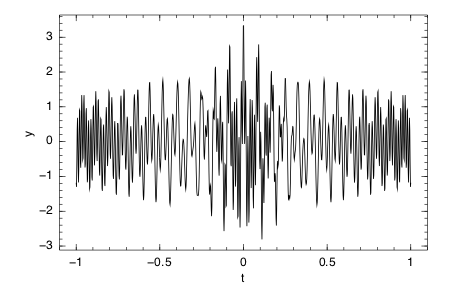

In [4]:
# multicomponent data (Boashash+15,p346,Example 6.2.2)
nsample=1024
t,x=sampledata.genmultifm622(nsample);
Winston.plot(t,x)
Winston.xlabel("t")
Winston.ylabel("y")

In [6]:
# STFT
tfrstft=stft.tfrstft(x,NaN,NaN,NaN,NaN,4);

Use fft.


In [5]:
# pseudo Wigner Ville
z=DSP.Util.hilbert(x);
tfr=cohenclass.tfrpwv(z);

Single pseudo Wigner Ville
Use fft.


In [23]:
# S-method (constant Lp=6)
sm1=smethod.tfrsm(x,6,NaN,4);

Use fft.


In [24]:
# S-method (constant Lp=15)
sm2=smethod.tfrsm(x,15,NaN,4);

Use fft.


### STFT is not affected by the cross terms, but, the resolution is poor. For the multi component FM, (pseudo) Wigner Ville has severe contaminations from cross terms. S-method has both advantages of the WV and STFT

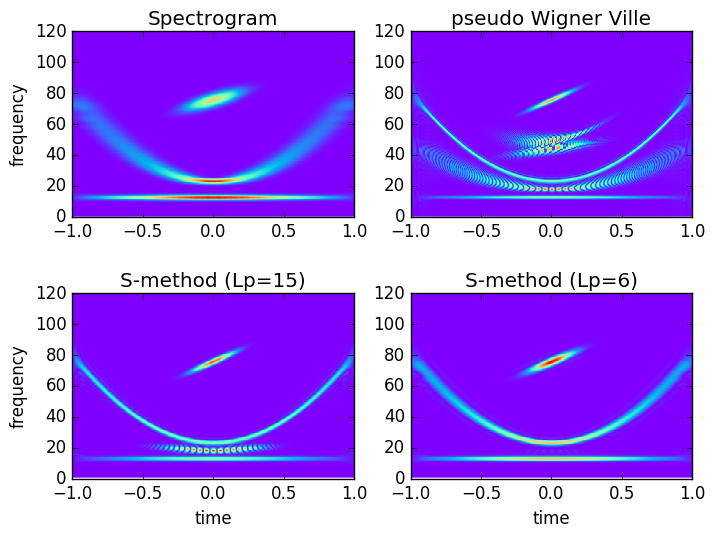

(0,120)

In [25]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.wtfrshow(abs(tfrstft).^2,t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("Spectrogram")
PyPlot.ylim(0,120)
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs(tfr),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.title("pseudo Wigner Ville")
PyPlot.ylim(0,120)
ax = fig[:add_subplot](2,2,3)
a=juwplot.wtfrshow(abs(sm2),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.title("S-method (Lp=15)")
PyPlot.ylim(0,120)
ax = fig[:add_subplot](2,2,4)
a=juwplot.wtfrshow(abs(sm1),t[2]-t[1],t[1],t[end],NaN,NaN,0.7*2,"rainbow")
PyPlot.xlabel("time")
PyPlot.title("S-method (Lp=6)")
PyPlot.ylim(0,120)

#### SM with N/2 = WV

Use fft.


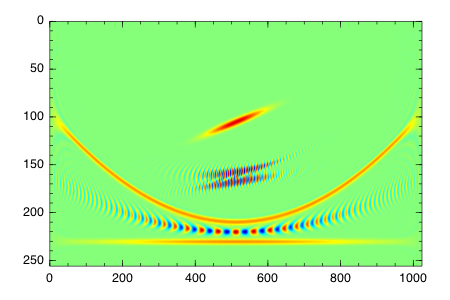

In [10]:
# Alias-free PWV = SM for Lp=N/2
trfafwv=smethod.tfrsm(x,floor(Int,nsample/2),NaN,4)
imagesc(trfafwv[end/4:-1:1,:])